In [1049]:
import os
import numpy as np
import pandas as pd

In [1050]:
###Load Cars data
df = pd.read_csv('CARS.csv')
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [1051]:
df.shape[0]

428

In [1052]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
Make           428 non-null object
Model          428 non-null object
Type           428 non-null object
Origin         428 non-null object
DriveTrain     428 non-null object
MSRP           428 non-null object
Invoice        428 non-null object
EngineSize     428 non-null float64
Cylinders      426 non-null float64
Horsepower     428 non-null int64
MPG_City       428 non-null int64
MPG_Highway    428 non-null int64
Weight         428 non-null int64
Wheelbase      428 non-null int64
Length         428 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [1053]:
df.columns.tolist()

['Make',
 'Model',
 'Type',
 'Origin',
 'DriveTrain',
 'MSRP',
 'Invoice',
 'EngineSize',
 'Cylinders',
 'Horsepower',
 'MPG_City',
 'MPG_Highway',
 'Weight',
 'Wheelbase',
 'Length']

In [1054]:
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice         object
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [1055]:
### Find null values
df[df['Cylinders'].isnull()]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
247,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.3,NaN,197,18,25,3053,106,174
248,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.3,NaN,238,18,24,3029,106,174


In [1056]:
# Drop raws247 and 248, because the model RX-8 has no Cylinders
df = df.dropna()
df[df['Cylinders'].isnull()]


,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length


In [1057]:
### MSRP and Invoice are objects
### I am transforming them into numeric values
### To do so first i have to get rid of special characters like $ and , and then transform them
df.Invoice =df.Invoice.str.replace('[,]','')
df.MSRP =df.MSRP.str.replace('[,]','')
df.Invoice =df.Invoice.str.replace('[$]','')
df.MSRP =df.MSRP.str.replace('[$]','')
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


In [1058]:
# now that they dont have special characters can be transformed to numeric
df[['MSRP','Invoice']] = df[['MSRP','Invoice']].astype('int64')
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int64
Invoice          int64
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [1059]:
# Count each car by type
df.Type.value_counts()

Sedan     262
SUV        60
Sports     47
Wagon      30
Truck      24
Hybrid      3
Name: Type, dtype: int64

In [1060]:
# Add Range and median in the stats
stats_df = df.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
mean,32804.549296,30040.65493,3.205634,5.807512,215.877934,20.070423,26.85446,3580.474178,108.164319,186.420188
25%,20324.750000,18836.00000,2.400000,4.000000,165.000000,17.000000,24.00000,3111.250000,103.000000,178.000000
median,27807.500000,25521.50000,3.000000,6.000000,210.000000,19.000000,26.00000,3476.000000,107.000000,187.000000
75%,39225.000000,35754.75000,3.900000,6.000000,255.000000,21.750000,29.00000,3979.250000,112.000000,194.000000
range,182185.000000,163685.00000,6.900000,9.000000,427.000000,50.000000,54.00000,5340.000000,55.000000,95.000000


In [1061]:
df.groupby('Type').agg(['mean', 'median']) 

MSRP                Invoice          EngineSize         \
                mean   median          mean   median       mean median   
Type                                                                     
Hybrid  19920.000000  20140.0  18429.333333  18451.0   1.633333   1.50   
SUV     34790.250000  32062.5  31625.350000  29724.5   3.920000   4.00   
Sedan   29773.618321  26432.5  27389.797710  24063.0   2.970992   3.00   
Sports  54533.319149  41045.0  49493.872340  37575.0   3.534043   3.20   
Truck   24941.375000  22180.0  22616.750000  19986.0   4.079167   3.85   
Wagon   28840.533333  25545.0  26645.633333  23721.0   2.770000   2.50   

       Cylinders         Horsepower          MPG_City        MPG_Highway  \
            mean median        mean median       mean median        mean   
Type                                                                       
Hybrid  3.666667    4.0   92.000000   93.0  55.000000     59   56.000000   
SUV     6.566667    6.0  235.816667  231.0  16.100000     16   20.500000   
Sedan   5.580153    6.0  201.656489  200.0  21.083969     20   28.629771   
Sports  6.340426    6.0  287.000000  287.0  18.425532     18   25.531915   
Truck   6.250000    6.0  224.833333  208.5  16.500000     16   21.000000   
Wagon   5.300000    5.5  194.000000  170.0  21.100000     20   27.900000   

                    Weight           Wheelbase             Length         
       median         mean  median        mean median        mean median  
Type                                                                      
Hybrid   51.0  2490.666667  2732.0  101.333333  103.0  168.333333    175  
SUV      21.0  4444.433333  4438.0  111.083333  110.5  188.133333    188  
Sedan    28.0  3399.064885  3443.5  108.000000  107.0  187.103053    188  
Sports   26.0  3306.531915  3246.0   99.723404  101.0  173.255319    175  
Truck    19.5  4250.750000  4112.5  123.000000  124.5  207.708333    208  
Wagon    27.5  3438.800000  3464.0  105.800000  106.0  182.433333    184

In [1062]:
import matplotlib.pyplot as plt
%matplotlib inline

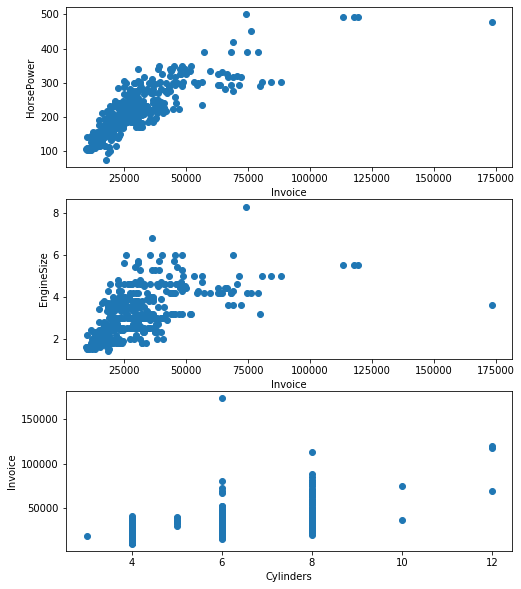

In [1063]:
# Scatter plot to compare actual prise vs horse power, engine size and cylinders
fig, ax = plt.subplots(3, figsize=(8, 10))
ax[0].scatter(x = df['Invoice'], y = df['Horsepower'])
ax[0].set_xlabel("Invoice")
ax[0].set_ylabel("HorsePower")

ax[1].scatter(x = df['Invoice'], y = df['EngineSize'])
ax[1].set_xlabel("Invoice")
ax[1].set_ylabel("EngineSize")

ax[2].scatter(x = df['Cylinders'], y = df['Invoice'])
ax[2].set_xlabel("Cylinders")
ax[2].set_ylabel("Invoice")

plt.show()


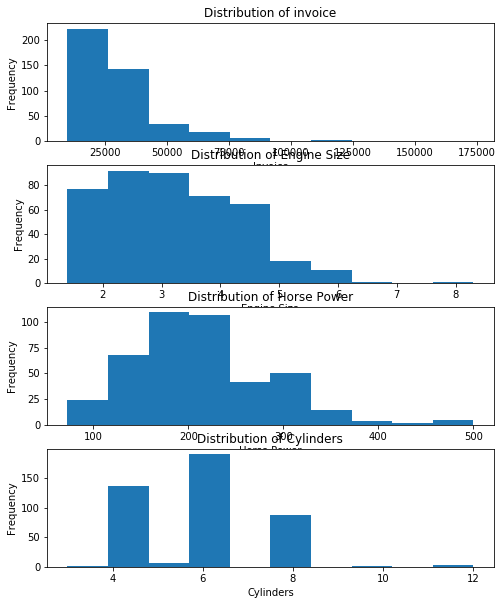

In [1064]:
# Distribuition of Invoice, EngineSize, Horsepower

fig, ax = plt.subplots(4, figsize=(8, 10))

ax[0].hist(x = df['Invoice'])
ax[0].set(xlabel='Invoice', 
          ylabel='Frequency',
          title='Distribution of invoice');


ax[1].hist(x = df['EngineSize'])
ax[1].set(xlabel='Engine Size', 
          ylabel='Frequency',
          title='Distribution of Engine Size');


ax[2].hist(x = df['Horsepower'])
ax[2].set(xlabel='Horse Power', 
          ylabel='Frequency',
          title='Distribution of Horse Power');


ax[3].hist(x = df['Cylinders'])
ax[3].set(xlabel='Cylinders', 
          ylabel='Frequency',
          title='Distribution of Cylinders');




plt.show()

In [1065]:
df['Cylinders'].value_counts(ascending=False)

6.0     190
4.0     136
8.0      87
5.0       7
12.0      3
10.0      2
3.0       1
Name: Cylinders, dtype: int64

In [1066]:
# removing outliers
# keeping only values under 90000

df = df.loc[df['Invoice'] <= 90000,:]
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])
data = df.copy() # Keep a copy our original data 

Number of rows in the data: 422
Number of columns in the data: 15


In [1067]:
### Drop Cylinders with values of 3,5,10,12
cyl_array = [3,5,10,12]
cyl = df.drop(df.loc[df['Cylinders'].isin(cyl_array)].index,inplace=True)


In [1068]:
df['Cylinders'].value_counts(ascending=False)

6.0    189
4.0    136
8.0     86
Name: Cylinders, dtype: int64

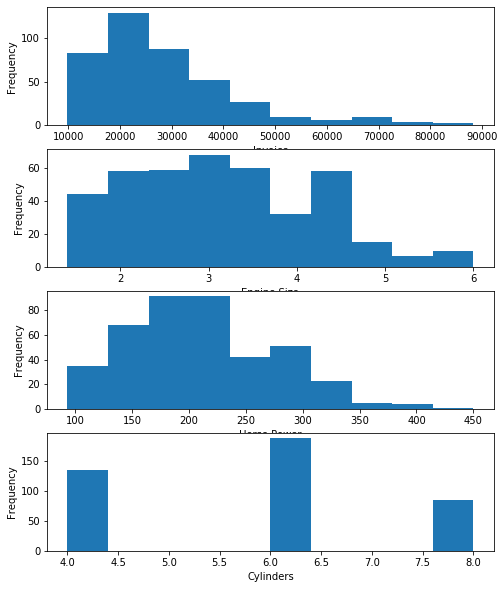

In [1069]:
# Distribuition of Invoice, EngineSize, Horsepower

fig, ax = plt.subplots(4, figsize=(8, 10))

ax[0].hist(x = df['Invoice'])
ax[0].set(xlabel='Invoice', 
          ylabel='Frequency');


ax[1].hist(x = df['EngineSize'])
ax[1].set(xlabel='Engine Size', 
          ylabel='Frequency');


ax[2].hist(x = df['Horsepower'])
ax[2].set(xlabel='Horse Power', 
          ylabel='Frequency');


ax[3].hist(x = df['Cylinders'])
ax[3].set(xlabel='Cylinders', 
          ylabel='Frequency');




plt.show()

In [1070]:
df.EngineSize.value_counts(ascending=False)

3.0    42
3.5    34
2.0    29
1.8    23
2.5    22
2.4    22
4.6    21
4.2    20
3.2    18
3.8    17
2.2    15
3.4    12
2.7    12
2.3    11
1.6    10
3.3    10
4.3     8
5.0     8
4.0     8
1.5     6
6.0     5
5.3     5
4.4     5
4.7     5
2.8     4
3.6     4
1.7     4
3.9     4
4.5     4
2.9     3
3.7     3
5.7     3
2.6     3
1.9     3
4.8     2
5.6     2
5.4     2
3.1     1
1.4     1
Name: EngineSize, dtype: int64

In [1071]:
df.Invoice.value_counts(ascending=False)

19638    2
68306    2
14207    2
37886    1
19810    1
        ..
34483    1
27317    1
24249    1
18109    1
20482    1
Name: Invoice, Length: 408, dtype: int64

In [1072]:
# Making the engine Size categorical 
value = df['EngineSize']
labels = ["{0} - {1}".format(i, i + 1) for i in range(1, 7, 1)]
labels
df['enginegroup'] = pd.cut(value, range(1, 8, 1), right=False, labels=labels)
df['enginegroup'].value_counts(ascending=True)

6 - 7      5
5 - 6     20
1 - 2     47
4 - 5     73
2 - 3    121
3 - 4    145
Name: enginegroup, dtype: int64

In [1073]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 426
Data columns (total 16 columns):
Make           411 non-null object
Model          411 non-null object
Type           411 non-null object
Origin         411 non-null object
DriveTrain     411 non-null object
MSRP           411 non-null int64
Invoice        411 non-null int64
EngineSize     411 non-null float64
Cylinders      411 non-null float64
Horsepower     411 non-null int64
MPG_City       411 non-null int64
MPG_Highway    411 non-null int64
Weight         411 non-null int64
Wheelbase      411 non-null int64
Length         411 non-null int64
enginegroup    411 non-null category
dtypes: category(1), float64(2), int64(8), object(5)
memory usage: 52.0+ KB


In [1074]:
df['enginegroup'] = df['enginegroup'].astype('str')
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int64
Invoice          int64
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
enginegroup     object
dtype: object

(array([ 83., 130.,  90.,  57.,  27.,  10.,   6.,  11.,   5.,   3.]),
 array([ 9875. , 17719.9, 25564.8, 33409.7, 41254.6, 49099.5, 56944.4,
        64789.3, 72634.2, 80479.1, 88324. ]),
 <a list of 10 Patch objects>)

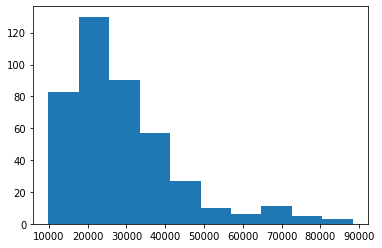

In [1075]:
plt.hist(data['Invoice'])

In [1076]:
# Dropping columns Model because it will not gine any value to my model
# and MSRP because it is the price that the car had
# i want to deal with actual price that was sold which is Invoice
# and enginesize because i made new column which categorize it

df_n = df.drop(['Model','MSRP', 'EngineSize'],axis=1)

In [1077]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 426
Data columns (total 13 columns):
Make           411 non-null object
Type           411 non-null object
Origin         411 non-null object
DriveTrain     411 non-null object
Invoice        411 non-null int64
Cylinders      411 non-null float64
Horsepower     411 non-null int64
MPG_City       411 non-null int64
MPG_Highway    411 non-null int64
Weight         411 non-null int64
Wheelbase      411 non-null int64
Length         411 non-null int64
enginegroup    411 non-null object
dtypes: float64(1), int64(7), object(5)
memory usage: 45.0+ KB


In [1078]:
# Get all the sting values 
# and make categorical values to dummies
one_hot_encode_cols = df_n.dtypes[df_n.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

df_n[one_hot_encode_cols]

,Make,Type,Origin,DriveTrain,enginegroup
0,Acura,SUV,Asia,All,3 - 4
1,Acura,Sedan,Asia,Front,2 - 3
2,Acura,Sedan,Asia,Front,2 - 3
3,Acura,Sedan,Asia,Front,3 - 4
4,Acura,Sedan,Asia,Front,3 - 4
...,...,...,...,...,...
416,Volvo,SUV,Europe,All,2 - 3
417,Volvo,Sedan,Europe,Front,1 - 2
421,Volvo,Sedan,Europe,Front,2 - 3
425,Volvo,Sedan,Europe,Front,2 - 3


In [1079]:
# Do the one hot encoding
df_n = pd.get_dummies(df_n,columns=one_hot_encode_cols)
df_n.describe().head()

,Invoice,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,Make_Audi,...,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear,enginegroup_1 - 2,enginegroup_2 - 3,enginegroup_3 - 4,enginegroup_4 - 5,enginegroup_5 - 6,enginegroup_6 - 7
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,...,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,28782.591241,5.756691,211.944039,20.097324,26.888078,3565.720195,108.199513,186.459854,0.017032,0.046229,...,0.352798,0.211679,0.537713,0.250608,0.114355,0.294404,0.352798,0.177616,0.048662,0.012165
std,14396.582696,1.451382,65.077172,4.871547,5.422818,738.417307,8.250593,14.331450,0.129547,0.210236,...,0.478423,0.408996,0.499183,0.433891,0.318630,0.456330,0.478423,0.382655,0.215422,0.109758
min,9875.000000,4.000000,93.000000,10.000000,12.000000,2035.000000,89.000000,143.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18654.500000,4.000000,164.000000,17.000000,24.000000,3096.000000,103.000000,178.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [1080]:
# Check for skewness
# Tha data has right skewness
num_cols = df_n.select_dtypes('number').columns

skew_vals = df_n[num_cols].skew()
skew_vals

Invoice              1.518434
Cylinders            0.189460
Horsepower           0.493596
MPG_City             2.294185
MPG_Highway          0.672459
                       ...   
enginegroup_2 - 3    0.905492
enginegroup_3 - 4    0.618372
enginegroup_4 - 5    1.693229
enginegroup_5 - 6    4.210756
enginegroup_6 - 7    8.932765
Length: 64, dtype: float64

In [1081]:
df_n.describe

<bound method NDFrame.describe of      Invoice  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  \
0      33337        6.0         265        17           23    4451        106   
1      21761        4.0         200        24           31    2778        101   
2      24647        4.0         200        22           29    3230        105   
3      30299        6.0         270        20           28    3575        108   
4      39014        6.0         225        18           24    3880        115   
..       ...        ...         ...       ...          ...     ...        ...   
416    38851        6.0         268        15           20    4638        113   
417    23701        4.0         170        22           29    2767        101   
421    35542        6.0         208        20           28    3576        110   
425    42573        6.0         268        19           26    3653        110   
426    24641        4.0         170        22           29    2822        1

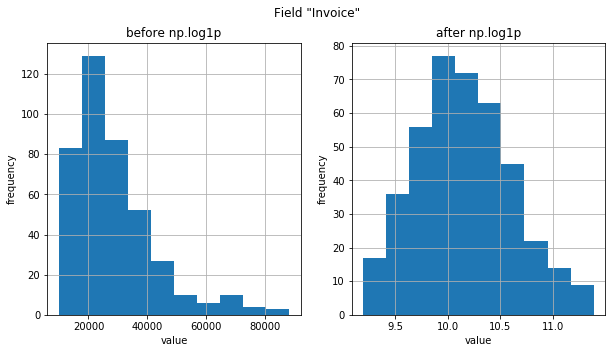

In [1082]:
#  apply np.log1p and visualize.

# Choose a field
field = "Invoice"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df_n[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df_n[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [1083]:
# Perform the skew transformation:

for col in skew_vals.index.values:
    if col == "Invoice":
        continue
    df_n[col] = df_n[col].apply(np.log1p)

(array([15., 20., 37., 63., 63., 91., 51., 51., 15.,  5.]),
 array([4.54329478, 4.70011204, 4.85692929, 5.01374655, 5.17056381,
        5.32738106, 5.48419832, 5.64101557, 5.79783283, 5.95465008,
        6.11146734]),
 <a list of 10 Patch objects>)

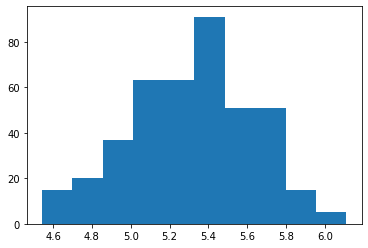

In [1085]:
plt.hist(df_n['Horsepower'])

In [1088]:
df_n.describe()

,Invoice,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,Make_Audi,...,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear,enginegroup_1 - 2,enginegroup_2 - 3,enginegroup_3 - 4,enginegroup_4 - 5,enginegroup_5 - 6,enginegroup_6 - 7
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,...,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,28782.591241,1.887158,5.313705,3.026800,3.309542,8.158807,4.690426,5.230640,0.011803,0.032043,...,0.244629,0.146729,0.372803,0.173828,0.079285,0.204102,0.244629,0.123169,0.033752,0.008438
std,14396.582696,0.217581,0.311574,0.205327,0.194320,0.202383,0.073695,0.076705,0.089844,0.145630,...,0.331787,0.283691,0.346191,0.301025,0.220947,0.316406,0.331787,0.265381,0.149414,0.076111
min,9875.000000,1.609438,4.543295,2.397895,2.564949,7.618742,4.499810,4.969813,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18654.500000,1.609438,5.105927,2.890372,3.218876,8.038188,4.644391,5.187386,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24915.000000,1.945910,5.351858,2.995732,3.295837,8.152774,4.682131,5.236442,0.000000,0.000000,...,0.000000,0.000000,0.693359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,34688.000000,1.945910,5.525453,3.135494,3.433987,8.287150,4.727388,5.273000,0.000000,0.000000,...,0.693359,0.000000,0.693359,0.346680,0.000000,0.693359,0.693359,0.000000,0.000000,0.000000
max,88324.000000,2.197225,6.111467,4.094345,3.951244,8.764210,4.976734,5.476464,0.693359,0.693359,...,0.693359,0.693359,0.693359,0.693359,0.693359,0.693359,0.693359,0.693359,0.693359,0.693359


In [1123]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 426
Data columns (total 64 columns):
Invoice               411 non-null int64
Cylinders             411 non-null float64
Horsepower            411 non-null float64
MPG_City              411 non-null float64
MPG_Highway           411 non-null float64
Weight                411 non-null float64
Wheelbase             411 non-null float64
Length                411 non-null float64
Make_Acura            411 non-null float16
Make_Audi             411 non-null float16
Make_BMW              411 non-null float16
Make_Buick            411 non-null float16
Make_Cadillac         411 non-null float16
Make_Chevrolet        411 non-null float16
Make_Chrysler         411 non-null float16
Make_Dodge            411 non-null float16
Make_Ford             411 non-null float16
Make_GMC              411 non-null float16
Make_Honda            411 non-null float16
Make_Hummer           411 non-null float16
Make_Hyundai          411 non-null fl

In [1124]:
df_small= df_n.loc[:,['Cylinders','Horsepower',
                      'MPG_City', 'MPG_Highway', 
                      'Weight', 'Wheelbase', 
                      'Length', 'Invoice']]

In [1170]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 426
Data columns (total 8 columns):
Cylinders      411 non-null float64
Horsepower     411 non-null float64
MPG_City       411 non-null float64
MPG_Highway    411 non-null float64
Weight         411 non-null float64
Wheelbase      411 non-null float64
Length         411 non-null float64
Invoice        411 non-null int64
dtypes: float64(7), int64(1)
memory usage: 48.9 KB


In [1126]:
import seaborn as sns

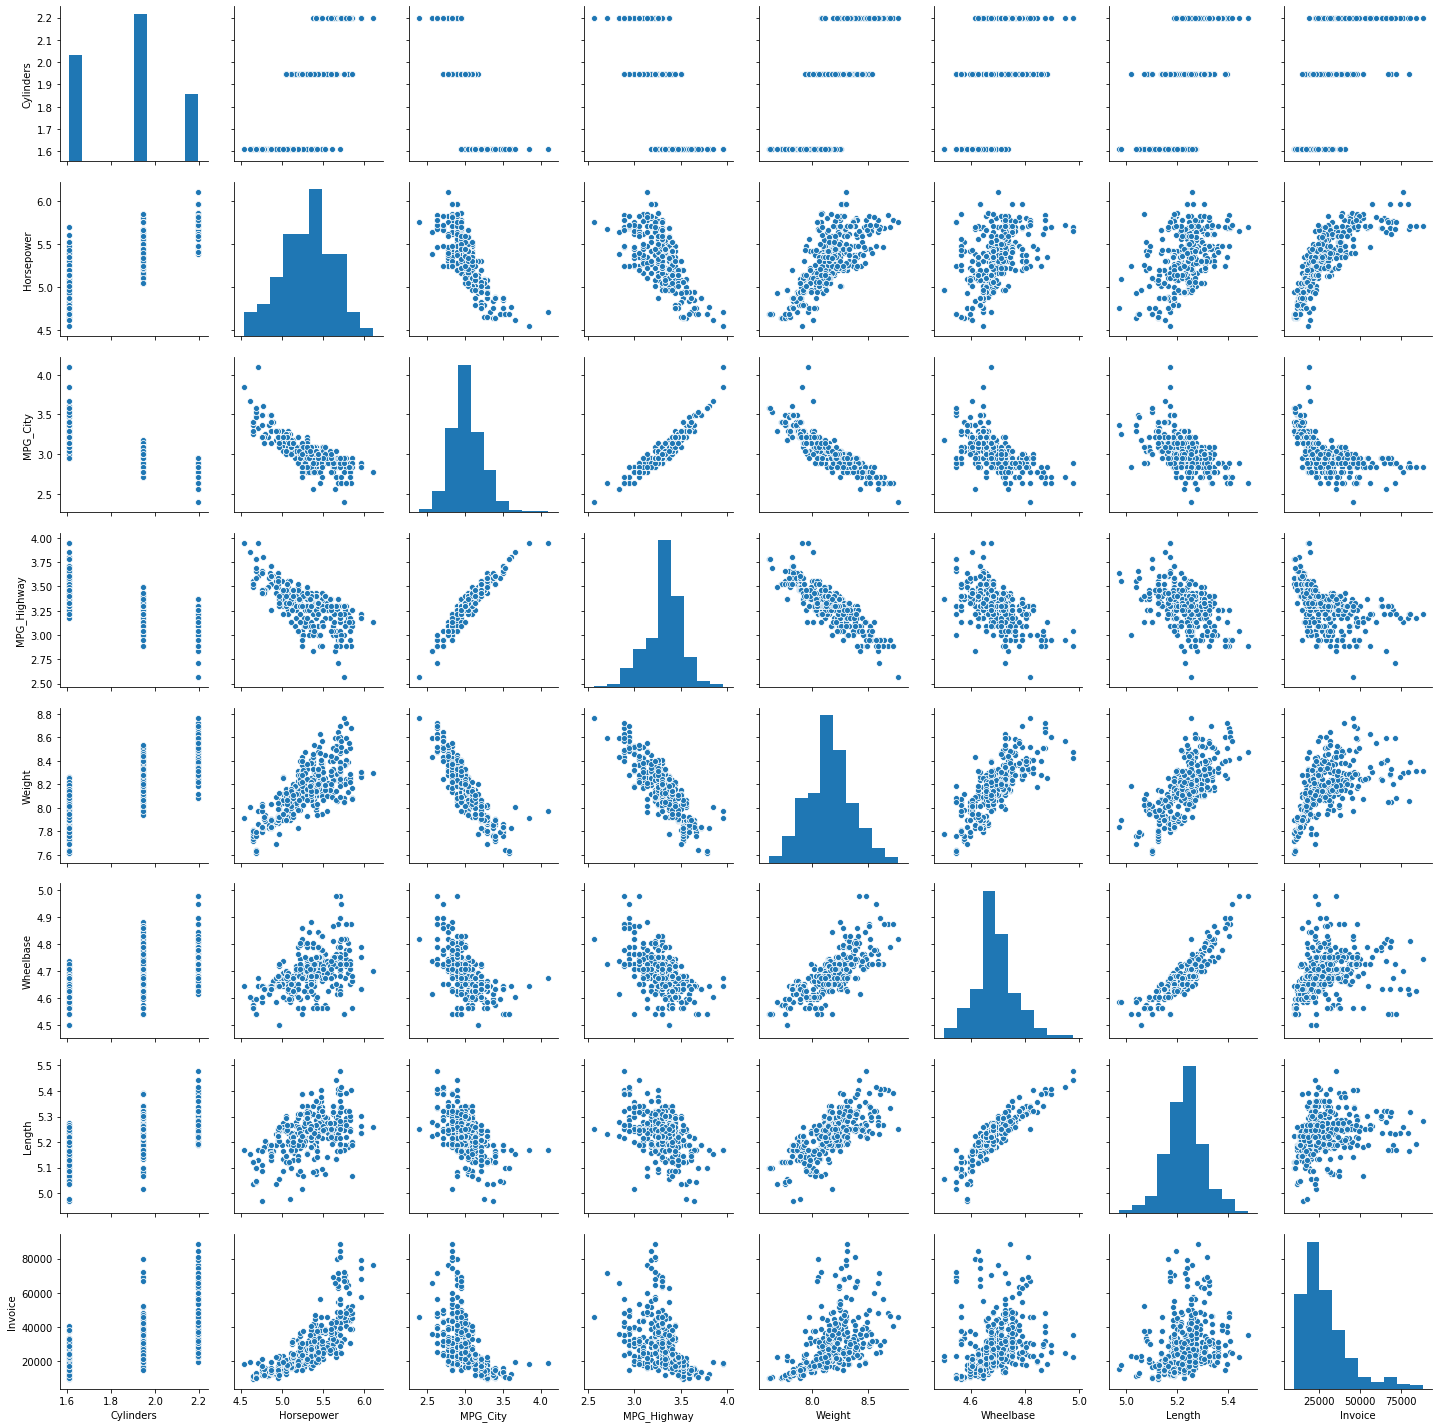

In [1129]:
plot = sns.pairplot(df_small)

In [1130]:
plot.savefig('snspairplotCars.png')

In [1226]:
#target variable invoice
#seperate feature and target variables

X = df_small.loc[:,['Cylinders','Horsepower', 
                    'MPG_City', 'MPG_Highway', 
                    'Weight', 'Wheelbase', 
                    'Length']]

y = df_small['Invoice']

In [1227]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 426
Data columns (total 7 columns):
Cylinders      411 non-null float64
Horsepower     411 non-null float64
MPG_City       411 non-null float64
MPG_Highway    411 non-null float64
Weight         411 non-null float64
Wheelbase      411 non-null float64
Length         411 non-null float64
dtypes: float64(7)
memory usage: 45.7 KB


In [1228]:
from sklearn.preprocessing import PolynomialFeatures

In [1231]:
pf = PolynomialFeatures(degree=2)

In [1232]:
features = ['Cylinders','Horsepower', 
            'MPG_City', 'MPG_Highway', 
            'Weight', 'Wheelbase', 
            'Length','Invoice']
pf.fit(df_small[features])

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [1233]:
pf.get_feature_names() 

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x6^2',
 'x6 x7',
 'x7^2']

In [1234]:
feat_array = pf.transform(df[features])
pd.DataFrame(feat_array, columns = pf.get_feature_names(input_features=features))

,1,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Invoice,Cylinders^2,...,Weight^2,Weight Wheelbase,Weight Length,Weight Invoice,Wheelbase^2,Wheelbase Length,Wheelbase Invoice,Length^2,Length Invoice,Invoice^2
0,1.0,6.0,265.0,17.0,23.0,4451.0,106.0,189.0,33337.0,36.0,...,19811401.0,471806.0,841239.0,148382987.0,11236.0,20034.0,3533722.0,35721.0,6300693.0,1.111356e+09
1,1.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0,21761.0,16.0,...,7717284.0,280578.0,477816.0,60452058.0,10201.0,17372.0,2197861.0,29584.0,3742892.0,4.735411e+08
2,1.0,4.0,200.0,22.0,29.0,3230.0,105.0,183.0,24647.0,16.0,...,10432900.0,339150.0,591090.0,79609810.0,11025.0,19215.0,2587935.0,33489.0,4510401.0,6.074746e+08
3,1.0,6.0,270.0,20.0,28.0,3575.0,108.0,186.0,30299.0,36.0,...,12780625.0,386100.0,664950.0,108318925.0,11664.0,20088.0,3272292.0,34596.0,5635614.0,9.180294e+08
4,1.0,6.0,225.0,18.0,24.0,3880.0,115.0,197.0,39014.0,36.0,...,15054400.0,446200.0,764360.0,151374320.0,13225.0,22655.0,4486610.0,38809.0,7685758.0,1.522092e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,1.0,6.0,268.0,15.0,20.0,4638.0,113.0,189.0,38851.0,36.0,...,21511044.0,524094.0,876582.0,180190938.0,12769.0,21357.0,4390163.0,35721.0,7342839.0,1.509400e+09
407,1.0,4.0,170.0,22.0,29.0,2767.0,101.0,178.0,23701.0,16.0,...,7656289.0,279467.0,492526.0,65580667.0,10201.0,17978.0,2393801.0,31684.0,4218778.0,5.617374e+08
408,1.0,6.0,208.0,20.0,28.0,3576.0,110.0,190.0,35542.0,36.0,...,12787776.0,393360.0,679440.0,127098192.0,12100.0,20900.0,3909620.0,36100.0,6752980.0,1.263234e+09
409,1.0,6.0,268.0,19.0,26.0,3653.0,110.0,190.0,42573.0,36.0,...,13344409.0,401830.0,694070.0,155519169.0,12100.0,20900.0,4683030.0,36100.0,8088870.0,1.812460e+09


In [1264]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,enginegroup
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189,3 - 4
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172,2 - 3
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183,2 - 3
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186,3 - 4
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197,3 - 4


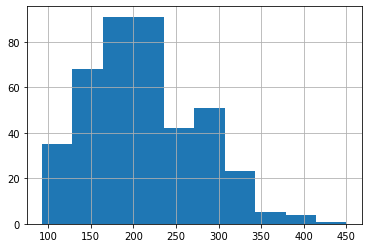

In [1376]:
df['Horsepower'].hist()

# Hypothesis
null hypothesis is that there is no significant difference between horse power of the cars
that people buyand the general populations, with mean of 200
null hypothesis = 200
alternative!=200

In [1375]:
from scipy import stats
import math

#city = df['MPG_City']
#highway = df['MPG_Highway']
horse = df['Horsepower']
stats.ttest_1samp(horse, 200) 

Ttest_1sampResult(statistic=3.720861020386198, pvalue=0.00022622942035270131)

The t-statistic value is 3.720 wand the value is 0.00022, which is far less than the standard thresholds of 0.05 or 0.01, so we reject the null hypothesis and we can say there is a statistically significant difference between the cars sold in this dataset and the general population.